In [463]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [464]:
traindata = pd.read_csv(r"H:\CodIt Solutions\Movie Genre Classification\archive (6)/Movie_combined.csv", index_col=False)

In [465]:
traindata.drop("Unnamed: 0", axis=1, inplace=True)

In [466]:
traindata.head()

,Title,Genre,Plot,Poster
0,the great train robbery,action,The film opens with two bandits breaking into ...,https://m.media-amazon.com/images/M/MV5BOWE4M2...
1,the suburbanite,comedy,The film is about a family who move to the sub...,https://m.media-amazon.com/images/M/MV5BMTUwOT...
2,how brown saw the baseball game,comedy,Before heading out to a baseball game at a nea...,0
3,the adventures of dollie,drama,On a beautiful summer day a father and mother ...,https://m.media-amazon.com/images/M/MV5BMDlmYz...
4,the black viper,drama,A thug accosts a girl as she leaves her workpl...,https://m.media-amazon.com/images/M/MV5BZDVjYT...


In [467]:
traindata.Genre.value_counts()

drama        5793
comedy       4267
action       3611
thriller     2107
romance       923
animation     602
Name: Genre, dtype: int64

In [468]:
LE=LabelEncoder()
y=LE.fit_transform(traindata['Genre'])

In [469]:
X=traindata.Plot
y=y
X_ = pd.concat([traindata['Plot'], pd.Series(y)], axis=1, keys=['Plot', 'Genre'])

X_.head()

X_['Genre'].value_counts()


3    5793
2    4267
0    3611
5    2107
4     923
1     602
Name: Genre, dtype: int64

In [470]:
X_.head()


zero=X_[X_['Genre']==0].sample(n=602)
one=X_[X_['Genre']==1].sample(n=602)
two=X_[X_['Genre']==2].sample(n=602)
three=X_[X_['Genre']==3].sample(n=602)
four=X_[X_['Genre']==4].sample(n=602)
five=X_[X_['Genre']==5].sample(n=602)

In [471]:
X_=pd.concat([zero,one,two,three,four,five], axis=0)

In [472]:
X_.head()

,Plot,Genre
11434,"Toomai (Sabu), a young boy growing up in India...",0
15346,Vardanunni is the son of famous Kathakali arti...,0
9073,The clinical psychologist Dr. Chris Kelvin is ...,0
4982,"After meeting a general, war correspondent Dic...",0
9076,High-school senior Peter Parker lives with his...,0


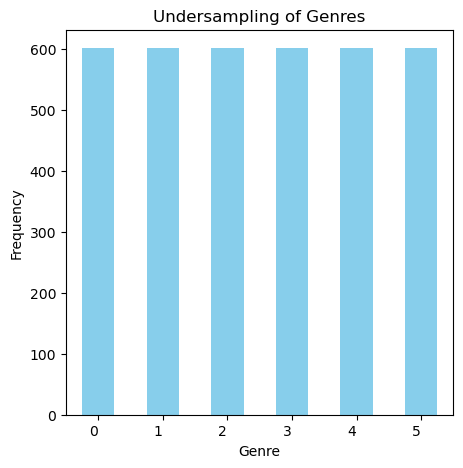

In [473]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_ is a DataFrame with a 'Genre' column containing lists of genres for each example
# If 'Genre' is a string with comma-separated genres, you may need to split it into a list first
# Example: X_['Genre'] = X_['Genre'].apply(lambda x: x.split(','))

# Create a DataFrame with one-hot encoding for each genre
genre_df = pd.get_dummies(X_['Genre'].explode()).groupby(level=0).sum()

# Plot the bar chart
plt.figure(figsize=(5, 5))
genre_df.sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Undersampling of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=0, ha='right')
plt.show()

In [486]:
def custom_tokenizer(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text)
    return words

In [487]:
ex_TfidfVectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, stop_words='english', max_features=5000, lowercase=True)

# Fit and transform the 'Genre' column
tfidf_matrix = ex_TfidfVectorizer.fit_transform(X_['Plot'])

In [476]:
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print(tfidf_matrix.shape)

print(ex_TfidfVectorizer.vocabulary_)

TF-IDF Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3612, 5000)
{'young': 4984, 'boy': 541, 'growing': 1966, 'india': 2210, 'hunter': 2162, 'meantime': 2821, 'helps': 2064, 'elephant': 1442, 'driver': 1362, 'father': 1640, 'large': 2531, 'family': 1625, 'petersen': 3240, 'walter': 4833, 'hires': 2092, 'annual': 196, 'government': 1920, 'wild': 4903, 'elephants': 1443, 'work': 4948, 'learning': 2560, 'look': 2662, 'allows': 143, 'come': 890, 'seen': 3960, 'region': 3630, 'reputation': 3678, 'north': 3060, 'weeks': 4881, 'hunting': 2164, 'prove': 3459, 'ready': 3575, 'right': 3755, 'hand': 1994, 'man': 2741, 'allan': 136, 'persuades': 3236, 'month': 2926, 'hired': 2091, 'natives': 2998, 'learn': 2558, 's': 3849, 'telling': 4478, 'sees': 3961, 'dance': 1101, 'night': 3042, 'spots': 4219, 'tiger': 4548, 'near': 3004, 'camp': 646, 'wakes': 4822, 'shoot': 4052, 'beast': 407

In [477]:
ex_TfidfVectorizer.get_feature_names_out()[:20]

array(['aaron', 'aarti', 'abandon', 'abandoned', 'abandoning', 'abandons',
       'abby', 'abel', 'abhi', 'abilities', 'ability', 'able', 'aboard',
       'abortion', 'abroad', 'abruptly', 'absence', 'abuse', 'abusive',
       'academy'], dtype=object)

In [478]:
X_train, X_test, y_train, y_test=train_test_split(tfidf_matrix, X_['Genre'], test_size=0.1, random_state=42)

In [479]:
model = LogisticRegression(max_iter=300)

In [480]:
from sklearn.model_selection import cross_val_score
k = 5
cv_scores = cross_val_score(model, tfidf_matrix, X_['Genre'], cv=k, scoring='accuracy')

In [481]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

In [482]:
y_pred = model.predict(X_test)

print(y_test[:20])
print(y_pred[:20])

8464     1
14057    4
16057    0
5218     3
7495     0
14963    4
6306     1
4954     1
12665    5
3324     5
14966    4
17006    1
15925    5
14041    4
5130     0
5384     3
16069    2
9927     1
7172     1
5860     5
Name: Genre, dtype: int32
[0 0 5 3 0 4 1 1 5 0 4 1 4 4 0 3 2 1 1 5]


In [483]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


In [484]:
# Display the classification report
print("\nClassification Info:")
print(classification_report(y_test, y_pred))


Classification Info:
              precision    recall  f1-score   support

           0       0.59      0.53      0.56        76
           1       0.89      0.75      0.81        64
           2       0.49      0.65      0.56        46
           3       0.42      0.44      0.43        52
           4       0.59      0.62      0.61        61
           5       0.67      0.63      0.65        63

    accuracy                           0.60       362
   macro avg       0.61      0.60      0.60       362
weighted avg       0.62      0.60      0.61       362

